In [ ]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [ ]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [ ]:
cohort = "experimental"             # cohort name

data_method = "data_beta"            # method name
eval_method = "eval_nominal"      # method name

scene = "flightroom"                  # scene name

courses = [                         # course names
    "robustness_track",
    # "hover",
    # "infinity"
    ]   

roster = [
    # "Maverick",                     # sifu_testbed
    # "Iceman",                       # sifs_testbed
    "Rooster",                      # sift_testbed
    # "Daishi"                        # sift_testbed double sized
    # "hsDavion",                     # sifu_testbed
    # "hsSteiner",                    # sifs_testbed
    # "hsKurita",                     # sift_testbed
    ]

Neps_hN = 200                        # histNet number of epochs 
Neps_cN = 200                       # commNet number of epochs

In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)
# ps.plot_rollout_data(cohort,show_3D=False,show_time=False)

Using existing observation data...

Output()

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/flightroom/splatfacto/2024-07-12_145513/nerfstudio_models/step-000029999.ckpt

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/flightroom/splatfacto/2024-07-12_145513/nerfstudio_models/step-000029999.ckpt

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/flightroom/splatfacto/2024-07-12_145513/nerfstudio_models/step-000029999.ckpt

KeyError: 'Eval_tte'

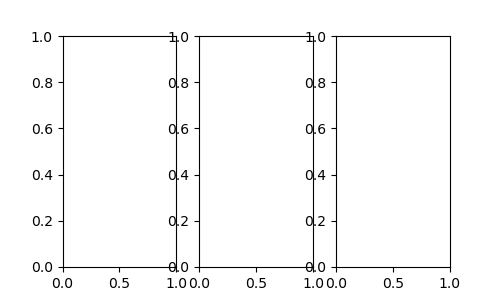

In [ ]:
# # Train the History Network
# # tp.train_roster(cohort,roster,"histNet",Neps_hN,regen=True)
# # tp.train_roster(cohort,roster,"histNet",Neps_hN,regen=False)
# tp.train_roster(cohort,roster,"histNet",30,regen=False,use_deploy=scene)

# Review Losses
pl.plot_losses(cohort,roster,"histNet")

In [ ]:
# Train the Command Network
# tp.train_roster(cohort,roster,"commNet",Neps_cN,regen=True,use_deploy=True)
tp.train_roster(cohort,roster,"commNet",Neps_cN,regen=False,use_deploy=True)

# Review Losses
pl.plot_losses(cohort,roster,"commNet")

Using existing observation data...

Output()

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/flightroom/splatfacto/2024-07-12_145513/nerfstudio_models/step-000029999.ckpt

{'expert': {'TTE': {'mean': 0.1607100415231255, 'best': 0.05863684183879618}, 'PP': 0.9555555555555556, 'hz': 
{'mean': 186.57026698876774, 'worse': 46.14246581370532}}, 'Rooster': {'TTE': {'mean': 14.761900825384323, 'best': 
3.6246420827396846}, 'PP': 0.07666666666666666, 'hz': {'mean': 438.7288640377308, 'worse': 115.01327190961939}}}

NameError: name 'Ndata_tn' is not defined

In [ ]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,course,scene,eval_method,roster)
    pl.plot_deployments(cohort,course,roster,plot_show=True)